# plant.Watering Prediction Model

## Problem Statement
We should predict the water consumption according to weather data

## Import all libraries

In [28]:
# Show Plot immedeately
%matplotlib inline 

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pymysql.cursors
import pandas as pd
from datetime import datetime
from sklearn import linear_model

## Import DataSet

In [29]:
r_DataSet = pd.read_csv("data/DataSet.csv")

r_DataSet

,Date,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean,Value_sum
0,2014-05-27,960.000,12.4,89.0,0.0,0.0,7.2,958.2,15.733333,69.400000,5.030698e-16,12.750000,8.937500,957.695833,0.000
1,2014-05-28,480.000,15.8,62.8,0.0,0.0,0.0,956.0,12.445833,83.887500,3.958333e-01,0.291667,11.583333,957.258333,0.000
2,2014-06-01,960.000,5.8,62.6,0.0,0.0,12.2,957.5,3.600000,87.266667,3.291667e-01,3.750000,6.595833,954.495833,0.000
3,2014-06-02,12.000,5.4,64.5,0.0,0.0,4.7,948.2,2.495833,90.637500,2.083333e-02,0.041667,6.779167,947.650000,2400.000
4,2014-06-05,480.000,17.0,43.3,0.0,0.0,16.2,958.9,11.329167,66.387500,5.065393e-16,31.666667,5.066667,959.604167,1452.000
5,2014-06-06,480.000,23.3,48.2,0.0,52.0,3.2,959.2,14.950000,65.329167,4.834096e-16,29.916667,6.554167,959.183333,1452.000
6,2014-06-08,480.000,20.4,63.1,0.0,0.0,5.8,959.9,18.062500,78.225000,8.333333e-02,10.625000,5.779167,962.829167,972.000
7,2014-06-09,480.000,18.9,73.6,0.0,0.0,6.5,956.9,17.712500,84.508333,5.000000e-02,7.250000,2.625000,958.900000,1440.000
8,2014-06-10,480.000,13.5,88.5,0.0,0.0,9.4,955.1,14.662500,85.537500,5.375000e-01,23.458333,4.979167,958.700000,1440.000
9,2014-06-11,480.000,4.9,87.7,0.0,0.0,2.5,957.4,4.179167,92.216667,2.125000e+00,0.000000,6.820833,948.075000,1440.000


## Variables

Variable | Description
:------------- |:-------------
Date          |   29 non-null object
Value         |   Pump Duration (predicted variable)29 non-null float64
Time          |   29 non-null object
DateTime_x    |   29 non-null object
DateTime_y    |   29 non-null object
tre200b0      |   Lufttemperatur 2 m über Boden; Stundenmittel 24h ago °C (tre200b0)
ure200b0      |   Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel 24h ago % (ure200b0)
rre150b0      |   Niederschlag; Stundensumme 24h ago mm (rre150b0)
sre000b0      |   Sonnenscheindauer; Stundensumme 24h ago min (sre000b0)
fu3010b0      |   Windgeschwindigkeit skalar; Stundenmittel 24h ago km/h (fu3010b0)
prestab0      |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
tre200b0_mean |   24h-Mean Lufttemperatur 2 m über Boden; Stundenmittel (from -48h to -24h) °C (tre200b0)
ure200b0_mean |  24h-Mean Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel (from -48h to -24h) % (ure200b0)
rre150b0_mean  |   24h-Summe Niederschlag; Stundenmittel (from -48h to -24h) mm (rre150b0)
sre000b0_mean  |  24h-Summe Sonnenscheindauer; Stundenmittel (from -48h to -24h) min (sre000b0)
fu3010b0_mean |   24h-Mean Windgeschwindigkeit skalar; Stundenmittel (from -48h to -24h) km/h (fu3010b0)
prestab0_mean |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
volumelst72h  |  Pump Duration in the last 72 hours

In [30]:
# Print more than one variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

r_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
Date             100 non-null object
Value            100 non-null float64
tre200b0         100 non-null float64
ure200b0         100 non-null float64
rre150b0         100 non-null float64
sre000b0         100 non-null float64
fu3010b0         100 non-null float64
prestab0         100 non-null float64
tre200b0_mean    100 non-null float64
ure200b0_mean    100 non-null float64
rre150b0_mean    100 non-null float64
sre000b0_mean    100 non-null float64
fu3010b0_mean    100 non-null float64
prestab0_mean    100 non-null float64
Value_sum        100 non-null float64
dtypes: float64(14), object(1)
memory usage: 11.8+ KB


## Lineares Model

In [31]:
#r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value != 480) & (r_DataSet.Value < 800)]
r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value < 600) & (r_DataSet.Value != 480)]
#r_DataSet = r_DataSet[(r_DataSet.Value < 100)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 600)]

r_DataSet.describe()

,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean,Value_sum
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000
mean,377.355571,16.308571,64.974286,0.091429,6.000000,7.357143,877.902857,15.844286,69.082738,1.127381e-01,18.078571,5.584881,906.797024,1393.502114
std,145.138066,8.106438,22.931001,0.474262,14.636779,5.683789,272.794933,6.896512,19.107904,3.377752e-01,13.307638,2.235615,226.551580,556.941085
min,109.288000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,398.666000
25%,290.194500,13.350000,61.550000,0.000000,0.000000,4.300000,955.150000,15.562500,68.554167,2.502628e-15,5.333333,4.260417,957.750000,1008.040500
50%,357.102000,18.800000,69.400000,0.000000,0.000000,6.100000,960.200000,18.100000,73.800000,2.959438e-15,16.625000,5.595833,961.708333,1293.137000
75%,506.728500,22.150000,77.800000,0.000000,0.500000,10.250000,963.800000,20.941667,77.566667,1.041667e-02,31.500000,6.766667,964.947917,1535.237500
max,596.706000,25.700000,89.700000,2.800000,60.000000,31.000000,972.300000,22.662500,91.633333,1.600000e+00,37.333333,11.200000,971.366667,2769.000000


### Divide DataSet into TrainingSet (60%) and TestSet (100%) and Define Training Variable (y) and Explanation Variables (X)

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

p_TrainSet = r_DataSet.sample(frac=0.6, replace=True) #60% of Data
p_TestSet = r_DataSet #100% of Data

Xtrain = p_TrainSet.loc[:,"tre200b0":]

yTrain = p_TrainSet.Value
yTest = p_TestSet.Value

# Test Model, get X and y from TestSet
Xtest = p_TestSet.loc[:,"tre200b0":]

#### Prepare (poly,scale) Features

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import PolynomialFeatures
Xtrain

polyDegree = 1
Xtrain = PolynomialFeatures(degree=polyDegree).fit_transform(Xtrain).astype(int)
Xtest = PolynomialFeatures(degree=polyDegree).fit_transform(Xtest).astype(int)

Xtrain

,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean,Value_sum
63,23.6,58.3,0.0,10.0,10.1,963.9,19.075000,68.016667,2.851885e-15,34.583333,5.933333,970.245833,1147.611
92,14.6,80.8,0.0,0.0,6.5,958.7,17.945833,75.050000,2.502628e-15,1.875000,7.462500,956.200000,1163.748
84,16.1,77.1,0.0,20.0,4.3,959.6,15.525000,91.633333,1.600000e+00,0.000000,5.479167,962.908333,1517.731
77,24.7,57.2,0.0,0.0,6.1,961.8,22.595833,74.479167,2.959438e-15,32.208333,4.025000,962.220833,1473.801
46,22.8,50.2,0.0,12.0,6.1,962.3,20.195833,60.937500,3.744690e-15,16.125000,7.941667,963.804167,1293.137
96,17.5,73.6,0.0,0.0,11.9,964.4,15.795833,76.025000,2.463307e-15,26.291667,4.991667,964.391667,398.666
84,16.1,77.1,0.0,20.0,4.3,959.6,15.525000,91.633333,1.600000e+00,0.000000,5.479167,962.908333,1517.731
26,25.7,50.7,0.0,21.0,6.1,961.0,18.616667,61.362500,4.834096e-16,33.750000,3.912500,960.091667,2059.000
76,24.9,69.9,0.0,0.0,6.8,960.8,21.116667,75.050000,2.959438e-15,32.541667,4.516667,965.354167,1373.961
65,2.3,86.4,0.0,0.0,8.3,955.3,2.287500,83.575000,1.250000e-02,3.625000,4.708333,951.408333,1212.792


array([[   1,   23,   58,    0,   10,   10,  963,   19,   68,    0,   34,
           5,  970, 1147],
       [   1,   14,   80,    0,    0,    6,  958,   17,   75,    0,    1,
           7,  956, 1163],
       [   1,   16,   77,    0,   20,    4,  959,   15,   91,    1,    0,
           5,  962, 1517],
       [   1,   24,   57,    0,    0,    6,  961,   22,   74,    0,   32,
           4,  962, 1473],
       [   1,   22,   50,    0,   12,    6,  962,   20,   60,    0,   16,
           7,  963, 1293],
       [   1,   17,   73,    0,    0,   11,  964,   15,   76,    0,   26,
           4,  964,  398],
       [   1,   16,   77,    0,   20,    4,  959,   15,   91,    1,    0,
           5,  962, 1517],
       [   1,   25,   50,    0,   21,    6,  961,   18,   61,    0,   33,
           3,  960, 2059],
       [   1,   24,   69,    0,    0,    6,  960,   21,   75,    0,   32,
           4,  965, 1373],
       [   1,    2,   86,    0,    0,    8,  955,    2,   83,    0,    3,
           4,  95

### Train Linear Regression and Set Train Variables

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error: 72.65
Variance score: 0.79


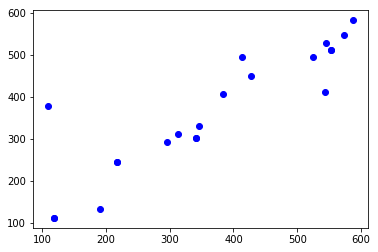

In [34]:
regr = linear_model.LinearRegression()
regr.fit(Xtrain, yTrain)

# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtrain) - yTrain) ** 2) ** 0.5)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Xtrain, yTrain))

# Plot outputs
plt.scatter(yTrain, regr.predict(Xtrain), color='blue')

plt.show()

Variance score: -5335.05


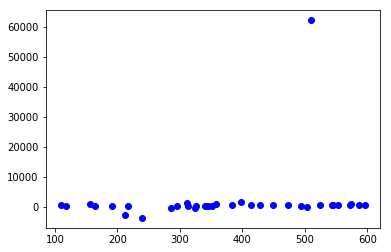

In [35]:
from sklearn.externals import joblib
#joblib.dump(regr, 'lr_medium_values.pkl', compress=9)

model_clone = regr
#model_clone = joblib.load('lr_medium_values.pkl')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_clone.score(Xtest, yTest))
plt.scatter(yTest, model_clone.predict(Xtest), color='blue')
plt.show()

In [36]:
#Save the model
joblib.dump(regr, 'data/linreg_med_5deg_' + str(model_clone.score(Xtest, yTest)) + '.pkl')

['data/linreg_med_5deg_-5335.04778384.pkl']

#### Port your model to other languages
Very good source for porting pkl (Pickle) Files to other langauges
https://github.com/nok/sklearn-porter